# Ames Housing Data EDA

This project aims to predict housing prices in Ames, Iowa based on the Ames Iowa Housing Dataset from the Ames City Assessor's Office, made available by Dean De Cock of Truman University in 2011. Professor De Cock's original paper can be found [here.](http://jse.amstat.org/v19n3/decock.pdf)

Presentation Slides for this project can be found [here.](https://www.beautiful.ai/player/-N4J5UYshyuRtwl5G4I7)

This notebook includes python code for data extraction and cleaning Preprocessing and feature engineering code as well as Model Fitting and Analysis code can be found in the Feature Engineering and Modeling notebooks, respectively

### Sections and steps

- <a href="#IMP">1. Reading in Data</a><br>
- <a href="#DQ">2. Data Quality</a><br>
    - <a href="#RD">2.1 Removing Duplicates</a><br>
    - <a href="#MD">2.2 Handling Missing Data</a><br>
    - <a href="#OT">2.3 Handling Outliers</a><br>
    - <a href="#SP">2.4 Summary of Data Cleaning </a>
- <a href="#EDA">3. Exploratory Data Analysis</a><br>
    - <a href="#FP">3.1 First Pass - Visualization</a><br>
    - <a href="#SEDA">3.2 Summary of EDA Findings </a>
- <a href="#EXP">4. Exporting Cleaned Dataset</a><br>

<p><a name="IMP"></a></p>

## 1. Importing Packages, Reading in Data

In [23]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

#helper module
from helper_module import *

#setting options to view dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#warnings
import warnings
warnings.filterwarnings("ignore")

#helper module functionality
%load_ext autoreload
%autoreload 2

### Helper Functions

In [24]:
#Function to help visualize missing values
def help_missing(title = 'Features with missing values'):
    num_missing = train.isnull().sum().sort_values(ascending = False)
    pct = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
    df_md = pd.concat([num_missing, pct], axis=1, keys=['Number', 'Percent'])
    
    #filtering for only the variables where there is 1 or more missing observations
    df_md.columns
    df_md = df_md.loc[df_md.Number > 0]
    has_missing = df_md['Number']
    
    #Making a chart
    fig, ax = plt.subplots()
    has_missing.plot.bar()
    p = ax.bar(x = has_missing.index, height = has_missing.values) 
    bottom, top = ax.get_ylim()
    ax.set_ylim(top = top*1.05)
    plt.title(title)
    fig = plt.gcf()
    fig.set_size_inches(len(has_missing)/2, 4)
    plt.show()
    return df_md

In [25]:
#reading in train data
train = pd.read_csv('./data/raw/train.csv')
print(f"Read in Ames Housing Train Data - Shape: {train.shape}")

Read in Ames Housing Train Data - Shape: (1460, 81)


In [26]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


<p><a name="DQ"></a></p>

## 2. Data Quality

In [27]:
print('The raw number of features is ', train.shape[1])
print('The raw number of observations is ', train.shape[0])
print('The datattypes are:', train.dtypes.unique())

The raw number of features is  81
The raw number of observations is  1460
The datattypes are: [dtype('int64') dtype('O') dtype('float64')]


In [28]:
#getting a look at column data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Noticing here categorical values that have numerical dtypes:

        - MSSubClass
        - MoSold

In [29]:
#changing the dtype of these variables to strings
for item in ['MSSubClass', 'MoSold']:
    train[item] = train[item].astype(str)
    print(train[item].dtype)

object
object


Looking at the number of categorical and numerical features in this dataset

In [30]:
#selecting just categorical variables in the dataframe and creating a list
cat_var = train.select_dtypes('O').columns.tolist()

#selecting just continuous variables in the dataframe and creating a list
num_var = train.select_dtypes('number').columns.tolist()
num_var.remove('Id')

print('The number of categorical features is' , len(cat_var))
print('The number of numerical features is', len(num_var))
print('The combined numerical and categorical features are', train.shape[1]-1)

The number of categorical features is 45
The number of numerical features is 35
The combined numerical and categorical features are 80


<p><a name="RD"></a></p>

### 2.1 Removing Duplicates

Reading the original paper that Professor De Cock released with the dataset, he notes that properties sold multiple times in this time frame were only included once (the most recent sale).

There were no duplicates in the original dataset, but since this dataset is a subset, and has been preprocessed, we will still check for duplicates to be thorough.

In [9]:
train[train.Id.duplicated()] #no duplicates found

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<p><a name="MD"></a></p>

### 2.2 Handling Missing Data

We can see that there are several variables missing data.

As per the data description, we will replace empty values that have meanings with the appropriate meaning. Eg. For PoolQC, NA actually means there is no pool on the property

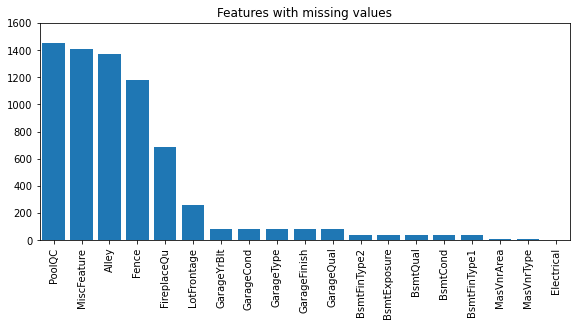

,Number,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [10]:
#using helper function to show us the columns with missing data
help_missing()

In [11]:
# Replacing missing values with appropriate meaning based on data description
train.fillna(value={'Alley' : 'NoAlley',
                   'BsmtQual': 'NoBasement',
                   'BsmtCond': 'NoBasement',
                   'BsmtExposure': 'NoBasement',
                   'BsmtFinType1': 'NoBasement',
                   'BsmtFinType2': 'NoBasement',
                   'FireplaceQu' : 'NoFireplace',
                   'GarageType': 'NoGarage',
                   'GarageFinish': 'NoGarage',
                   'GarageQual': 'NoGarage',
                    'GarageCond' : 'NoGarage',
                   'PoolQC': 'NoPool',
                   'Fence': 'NoFence',
                   'MiscFeature': 'NoMisc'},
            inplace = True)

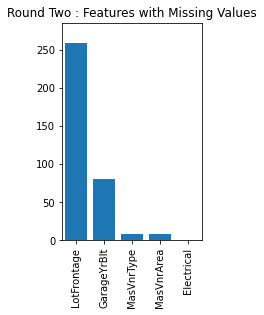

,Number,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [12]:
help_missing('Round Two : Features with Missing Values')

In [13]:
#Looking at MasVnrType, MasVnrArea
#Data description says NA is no MasVnrType
train['MasVnrType'].fillna('None', inplace=True)
#imputing 0 for MasVnrArea
train['MasVnrArea'].fillna(0, inplace=True)

In [14]:
#Looking at Electrical, there is one missing value
#looking at the options
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [15]:
#Looking at Electrical value counts
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [16]:
#going to drop the Electrical observation that is missing data
print(train.shape)
train.drop(np.where(train['Electrical'].isna())[0], axis = 0, inplace = True)
train.shape

(1460, 81)


(1459, 81)

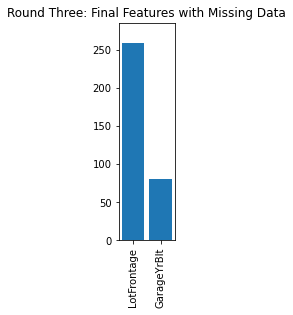

,Number,Percent
LotFrontage,259,0.177519
GarageYrBlt,81,0.055517


In [17]:
help_missing('Round Three: Final Features with Missing Data')

In [18]:
#Looking at Garage Year Built
print(train['GarageYrBlt'].describe())
print('Earliest Garage built was in : ', train['GarageYrBlt'].min())

count    1378.000000
mean     1978.485486
std        24.686740
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Earliest Garage built was in :  1900.0


In [19]:
#Looking at Garage Year Built side by side with Year House was Built
# converting both years to numerical
train['GarageYrBlt'] = train['GarageYrBlt'].astype(float)
train['YearBuilt'] = train['YearBuilt'].astype(float)
train[['GarageYrBlt', 'YearBuilt']].head(20)

,GarageYrBlt,YearBuilt
0,2003.0,2003.0
1,1976.0,1976.0
2,2001.0,2001.0
3,1998.0,1915.0
4,2000.0,2000.0
5,1993.0,1993.0
6,2004.0,2004.0
7,1973.0,1973.0
8,1931.0,1931.0
9,1939.0,1939.0


In [20]:
#imputing Garage year as year house was built for missing values
train['GarageYrBlt'].fillna(train.YearBuilt, inplace=True)

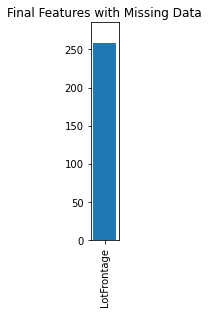

,Number,Percent
LotFrontage,259,0.177519


In [21]:
help_missing('Final Features with Missing Data')

In [22]:
#Looking at LotFrontage
#trying to see if these homes maybe don't have any street
#maybe high density aka condos or apartments?
train[train['LotFrontage'].isnull()]['MSZoning'].value_counts()

RL    229
RM     19
FV      8
RH      3
Name: MSZoning, dtype: int64

In [ ]:
#trying again, with type of dwelling
train[train['LotFrontage'].isnull()]['MSSubClass'].value_counts()

In [ ]:
#trying again with lot configuration
train[train['LotFrontage'].isnull()]['LotConfig'].value_counts()

In [ ]:
#visualizing with a count plot
sns.countplot(x=train[train['LotFrontage'].isnull()]['LotConfig'],
              data = train[train['LotFrontage'].isnull()],
             order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'])

In [ ]:
#comparing this with value counts of lot config across dataset
print(train.LotConfig.value_counts())
#visualizing with a count plot
sns.countplot(x=train['LotConfig'],
              data = train,
             order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'])

We could impute the missing values of Lot Frontage as the mean or median of the Lot Configuration. It would make sense that different types of Lot configuration might have more or less lot frontage.

Let's take a look at the distributions of Lot Frontage based on Lot Configuration

In [ ]:
#boxplot of Lot Frontage based on Lot Configuration
sns.boxplot(x='LotConfig',
            y = 'LotFrontage',
            order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
            data = train);

Immediately noticing some outliers in Lot Frontage, we will deal with those next.

The box plot shows that the amount of Lot Frontage of each property does change based on Lot Configuration. To be sure, let's run an ANOVA.

In [ ]:
#Running an ANOVA to make sure the group means are different
model = ols('LotFrontage ~ C(LotConfig)', data = train).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
effect_size = anova_tbl['sum_sq'][0]/(anova_tbl['sum_sq'][0]+anova_tbl['sum_sq'][1])
        
p_val = round(anova_tbl['PR(>F)'][0], 5)
print('ANOVA p-val and effect size for classes of Lot Config is :', p_val, ' and ', round(effect_size, 5))

In [ ]:
#imputing median values for missing Lot Config values

print(train['LotFrontage'].mean())
print(train['LotFrontage'].median())

#Noticing that the mean and the median for the entire Lot Frontage series are very close

In [ ]:
#imputing median LotFrontage value based on each LotConfig group
count = 0
for (idx, LotConfig) in train[train['LotFrontage'].isnull()].iterrows():
    config = train['LotConfig'][idx]
    dict1 = train.groupby(['LotConfig']).median()[['LotFrontage']].to_dict()
    train['LotFrontage'][idx] = dict1['LotFrontage'][config]
    count += 1
print(count)

In [ ]:
#testing to see if it worked
train['LotFrontage'].isnull().sum()

<p><a name="OT"></a></p>

### 2.3 Handling Outliers

In Professor De Cock's original paper, he recommends removing outliers from GrLivArea. We will look at these first:

In [ ]:
#Setting a Z-value threshold of 4.0
obs_to_drop = []

z_scores = stats.zscore(train[num_var][['GrLivArea']])
obs_to_drop += np.where(abs(z_scores) > 4.0)[0].tolist()
obs_to_drop

Creating a dictionary of observations that are outliers for the other numerical variables:

In [ ]:
ot_dict = {}
for var in num_var:
    z_scores = stats.zscore(train[num_var][[var]])
    outliers = np.where(abs(z_scores)> 4.0)[0].tolist()
    ot_dict[var] = outliers

In [ ]:
ot_dict.keys()

Of the features with outliers, taking a deeper look at LotArea, GrLivArea

In [ ]:
#Looking at Lot Area Outliers
train['LotArea'].describe()

In [ ]:
sns.scatterplot(x='LotArea', y = 'SalePrice',
                          data=train)

In [ ]:
train.loc[ot_dict['LotArea']]

In [ ]:
obs_to_drop += ot_dict['LotArea']

In [ ]:
#Looking at GrLivArea outliers
train['LotArea'].describe()

In [ ]:
sns.scatterplot(x='GrLivArea', y = 'SalePrice',
                          data=train)

Can clearly see some unusual outliers in GrLivArea

In [ ]:
train.loc[ot_dict['GrLivArea']]

In [ ]:
obs_to_drop += ot_dict['GrLivArea']

In [ ]:
print(set(obs_to_drop))
print('Need to drop ' , len(set(obs_to_drop)), ' observations.')

In [ ]:
train.shape

<p><a name="SP"></a></p>

### 2.4 Summary of Data Cleaning



<p><a name="EDA"></a></p>

## 3. Exploratory Data Analysis

<p><a name="FP"></a></p>

### 3.1 First Pass - Visualization


#### 3.1.1 Dependant Variable - Sale Price

In [ ]:
#descriptive summary of Sale Price
train['SalePrice'].describe()

In [ ]:
#plotting a histogram using seaborn
#histogram
plt.figure(figsize=(16,8))
sns.histplot(train.SalePrice, bins=30, kde=True)
plt.title("Ames Property Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count and Density")
plt.show()

Noticing that the dependent variable looks right skewed (aka not normally distributed)

In [ ]:
#checking Mean and Median
print('Median: %f' % round(train.SalePrice.median()))
print('Mean: %f' % round(train.SalePrice.mean()))
#checking skewness and kurtosis
print("Skewness: %f" % train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

In [ ]:
#looking at potential outliers
sns.boxplot(x = train.SalePrice, )
plt.show()

In [ ]:
ot_dict['SalePrice']

In [ ]:
train.loc[ot_dict['SalePrice']]

Noticing that there are only expensive property outliers in this dataset.

To ensure that the residuals of a linear model taken will be normal, we will take the log of the Sale Price instead of the Sale Price.

In [ ]:
#adding a column for log sale price
train['log_SalePrice'] = np.log(train['SalePrice'])

In [ ]:
#plotting a histogram using seaborn
#histogram
plt.figure(figsize=(16,8))
sns.histplot(train.log_SalePrice, bins=30, kde=True)
plt.title("Log of Ames Property Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count and Density")
plt.show()

In [ ]:
#checking Mean and Median
print('Median: %f' % round(train.log_SalePrice.median()))
print('Mean: %f' % round(train.log_SalePrice.mean()))
#checking skewness and kurtosis
print("Skewness: %f" % train.log_SalePrice.skew())
print("Kurtosis: %f" % train.log_SalePrice.kurt())

Much better!

Let's look at outliers for this new distribution

In [ ]:
lg_spoutliers = df[np.abs(stats.zscore(train.log_SalePrice)) > 4]
lgspoutliers.sort_values('log_SalePrice')

Much Better!

### 3.1.2 Independent Variables
##### Categorical
To get a sense of the independent variables in this dataset, we'll use a helper function to iterate through each categorical variable and look at:
- percentage of missing data
- value counts of observations
- anomalies and outliers
- distribution of variables via barplot and boxplot

Changes to be made will be noted for feature engineering and feature selection.

In [ ]:
cat_var

##### Numerical

<p><a name="SEDA"></a></p>

### 3.2 Summary of EDA Findings 




# Testing Below this

In [ ]:
def get_outliers(num_var):
    ot_dict = {}
    for var in num_var:
        z_scores = stats.zscore(train[num_var][[var]])
        outliers = np.where(abs(z_scores)> 4.0)[0].tolist()
        ot_dict[var] = outliers
    return ot_dict.keys()

In [ ]:
def look_cat(varlist):
    for var in varlist:
        data = pd.concat([train['log_SalePrice'], train[var]], axis=1)
        #info about missingness and value counts
        num_miss = data[var].isnull().sum()
        pct_miss = round(num_miss/data.shape[0]*100, 2)
        print(var + ' has ' + str(num_miss) + ' missing observations, equal to ' + str(pct_miss) + '%')
        print(train[var].value_counts(normalize = True))
        
         #Figures
        sns.set_theme(style="whitegrid")
        med = data.groupby([var])['log_SalePrice'].median().sort_values(ascending = False).reset_index()
        
         #seaborn Count Plot
        f, ax = plt.subplots(figsize = (6,4))
        fig1 = sns.countplot(x=data[var],
                      data=data,
                     order = list(med[var]));
        fig1.set(xlabel = var, ylabel = 'Count')
        
        
        f, ax = plt.subplots(figsize = (6,4))
        fig = sns.boxplot(x=var,
                          y = 'log_SalePrice',
                          order = list(med[var]),
                          data=data);
        plt.xticks(rotation=45)
        fig.set(xlabel=var, ylabel='Log of Sale Price')
        
        yield fig